<a href="https://colab.research.google.com/github/CarlosFlores96/PROYECTO-FINAL-BASE-DE-DATOS/blob/master/ProyectoFinalMineriaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

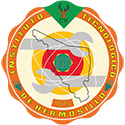

Proyecto final Mineria de datos.

Realizar un proyecto final para cualquier tarea vista en el curso utilizando algún conjunto de datos (datasets) como Kaggledatasets, UCI datasets, Microsoft datasets, Lionbridge datasets, entre otras.

1. Encuentre un tema interesante.-------------------------------------------------
  
  El teme debe tener datos de acceso publico que se   actualicen regularmente, Como ejemplo: el clima, precios de la electricidad, entre otros.

2. Importar y analizar varios conjuntos de datos------------------------------------------------

  Descargue tantos datos disponibles como se sienta cómodo trabajando, leer en los datos, averigua lo que quieres predecir.

3. Crear predicciones-----------------------------------------

  Calcular las características necesarias, reunir datos de entrenamiento y prueba, hacer predicciones




Introducción.

Una de las enfermedades más graves a lo largo de la historia de la humanidad es la diabetes, dicha enfermedad crónica (de larga duración) afecta la forma en que el cuerpo convierte los alimentos en energía.  

El cuerpo descompone la mayor parte de los alimentos que come en azúcar (también llamada glucosa) y los libera en el torrente sanguíneo.  

Esto afecta al paciente (en este caso se aplicará solo en mujeres) en varias zonas como en el torrente sanguíneo, cerebro, sistema nervioso, ojos, entre otros.  En este Dataset se pondrá en práctica la predicción de valores tomando en cuenta la glucosa, la edad y las personas que ya tuvieron diabetes.

lo que se hará en este proyecto es mostrar predicciones basándonos en un Dataset obtenido de la página Kaggle, tomando en cuenta que los datos son solamente en mujeres.

## **Se importarán las librerias**

In [ ]:
# Suprimir advertencias:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import sys
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## **Se agregará el dataset**

In [ ]:
dataset = pd.read_csv("diabetes.csv")

## **Mostrar la dimensión de la tabla**

In [ ]:
dataset.shape

(768, 9)

## **Se encabezará la lista**

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Obtener los valores de la tabla, mostrar minimo, maximo y contar los valores de la tabla.**



In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Definir los valores de entrada y resultado**

In [ ]:
x = dataset.iloc[:,[0,7]].values 
y = dataset.iloc[:, 8].values

## **Verificar si hay valores perdidos**

In [ ]:
print(f'Número de filas con valores perdidos: {dataset.isnull().any(axis=1).mean()}')

Número de filas con valores perdidos: 0.0


##**Generar una grafica donde diga la distribucion de glucosa**

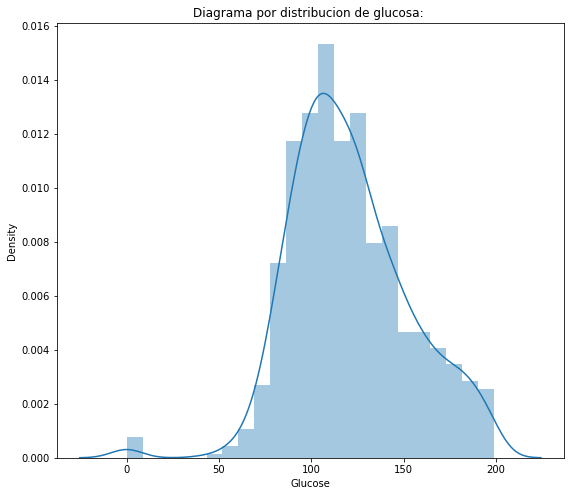

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diagrama por distribucion de glucosa: ')
sns.distplot(dataset.Glucose)
plt.show()

## **Conjunto de entrenamiento**

In [ ]:
features = dataset.drop(["Outcome"], axis=1)
X = np.array(features)
y = np.array(dataset["Outcome"])

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')

In [ ]:
tree.tree_.max_depth

17

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1.])

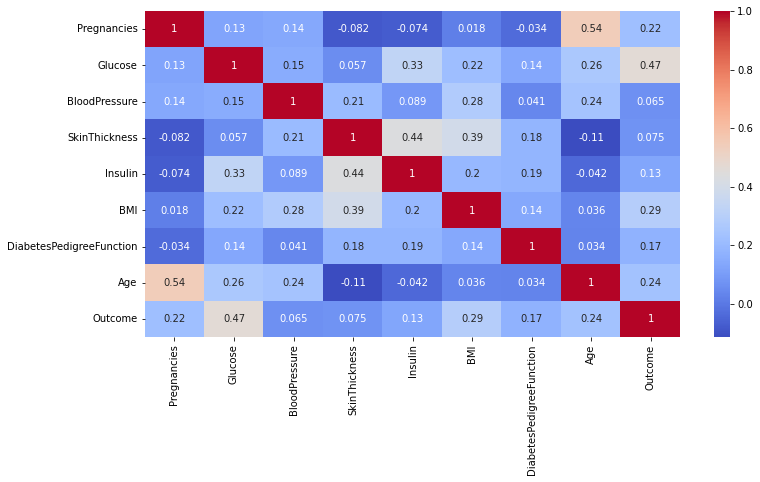

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

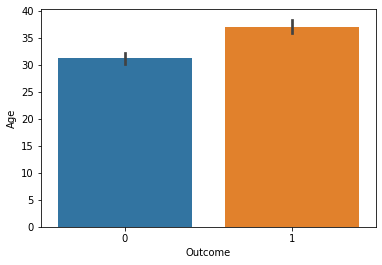

In [ ]:
sns.barplot(x='Outcome',y='Age',data=dataset)

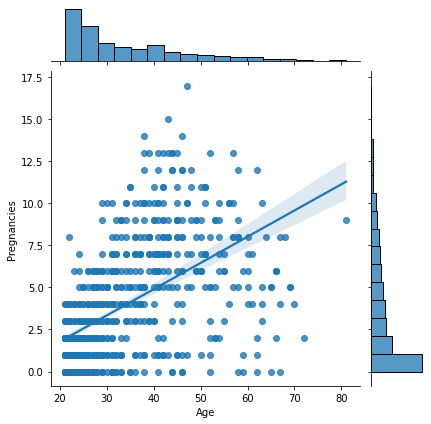

In [ ]:
g= sns.JointGrid(y="Pregnancies",x="Age",data=dataset)
g.plot(sns.regplot,sns.histplot);

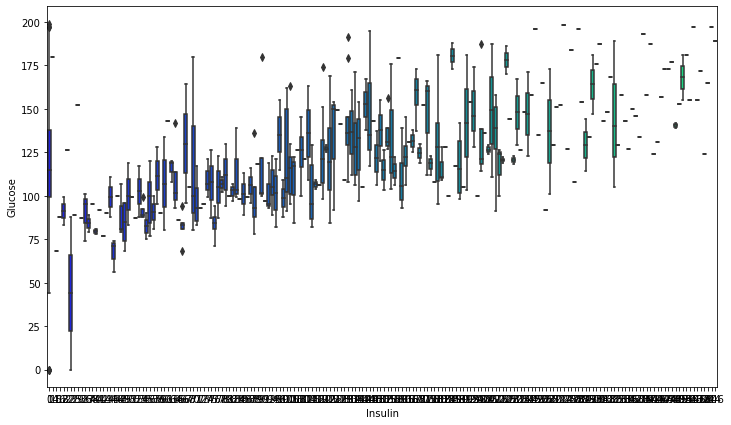

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=dataset,x='Insulin',y='Glucose',palette='winter')

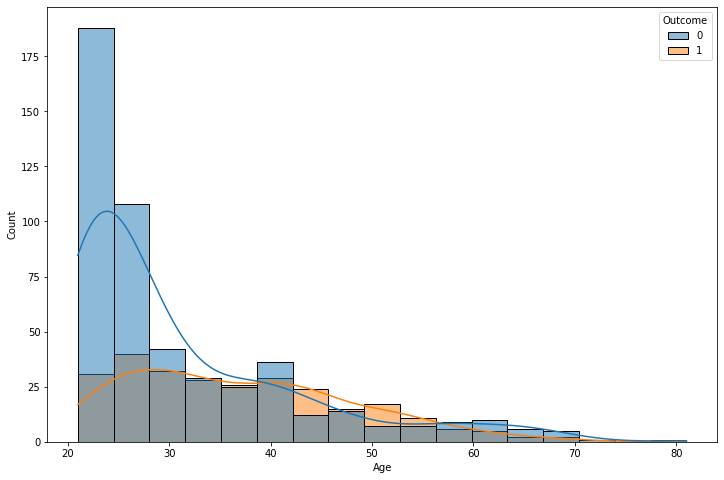

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=dataset,x='Age',kde=True,hue='Outcome');

In [ ]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
score = model.predict(X_train)

## **Prueba y evaluación de modelos**

In [ ]:
print("Training Score: ", model.score(X_train, y_train))
print("Testing Score:  ", model.score(X_test, y_test))

Training Score:  0.7850162866449512
Testing Score:   0.7857142857142857


In [ ]:
pred = model.predict(X_test)
print("Model Accuracy is : ", pred)

Model Accuracy is :  [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1]
